<a href="https://colab.research.google.com/github/NFalah25/PCVK/blob/main/Week%2010/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Naufal Falah Wafiuddin
# Kelas : TI - 3A
# Absen : 23
# NIM : 2141720129

##Kelompok:
####- Aido Lutfhi AL Hakim | 2141720136
####- Jauhar Maulana A'la | 2141720186
####- Naufal Falah Wafiuddin | 2141720129
Link GitHub : https://github.com/NFalah25/PCVK

1. Import folder yang ada di Drive anda dengan cara berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install pytesseract

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3.  Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


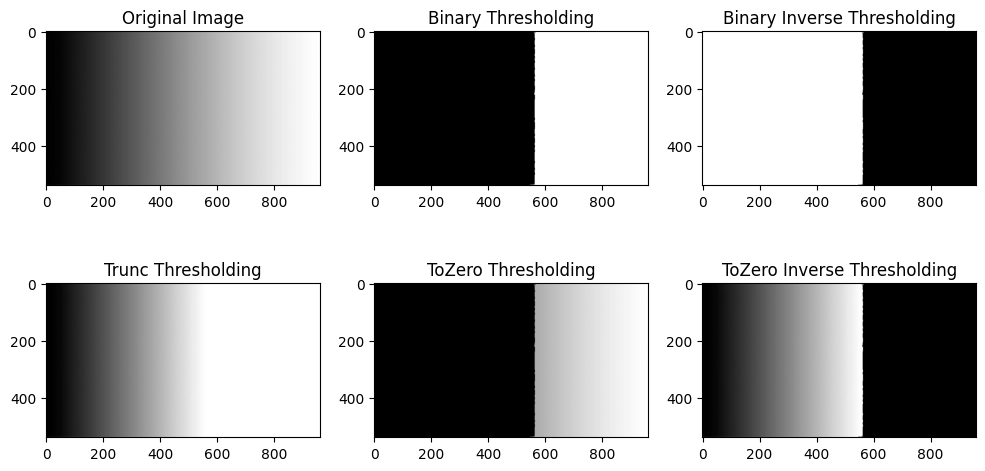

In [9]:
# Load the image using matplotlib
img = plt.imread('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')

# Set the threshold value
thresh = 170

# Create empty arrays for the thresholded images
thresh_binary = np.zeros_like(img)
thresh_binary_inv = np.zeros_like(img)
thresh_trunc = np.zeros_like(img)
thresh_tozero = np.zeros_like(img)
thresh_tozero_inv = np.zeros_like(img)

# Apply the thresholding operations
thresh_binary[img > thresh] = 255
thresh_binary_inv[img <= thresh] = 255
thresh_trunc = img.copy()
thresh_trunc[img > thresh] = thresh
thresh_tozero[img > thresh] = img[img > thresh]
thresh_tozero_inv[img <= thresh] = img[img <= thresh]
# Display the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


4.  Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

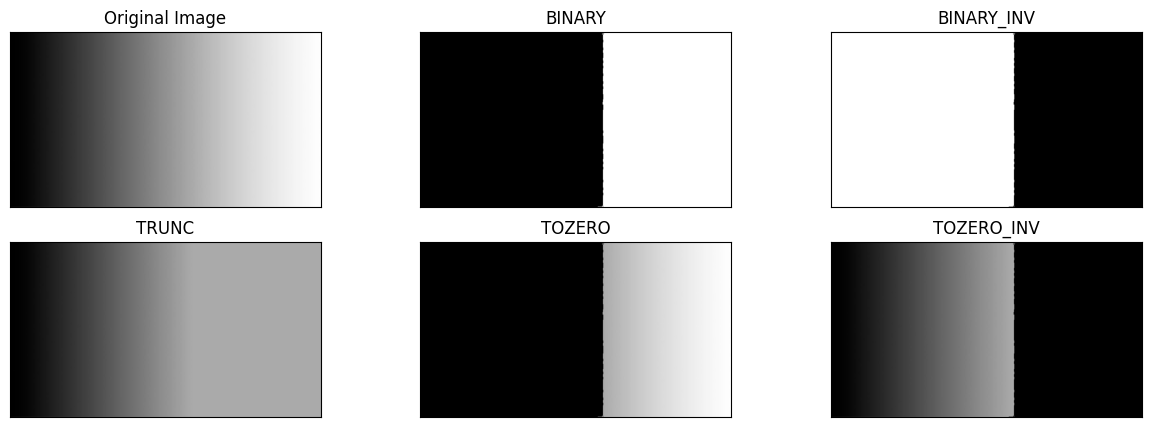

In [17]:
# Load the image using matplotlib
img = plt.imread('/content/drive/MyDrive/PCVK/gradient.jpg')

# Set the threshold value
thresh = 170

# Create empty arrays for the thresholded images
thresh_binary = np.zeros_like(img)
thresh_binary_inv = np.zeros_like(img)
thresh_trunc = np.zeros_like(img)
thresh_tozero = np.zeros_like(img)
thresh_tozero_inv = np.zeros_like(img)

# Apply the thresholding operations
thresh_binary[img > thresh] = 255
thresh_binary_inv[img <= thresh] = 255
thresh_trunc = img.copy()
thresh_trunc[img > thresh] = thresh
thresh_tozero[img > thresh] = img[img > thresh]
thresh_tozero_inv[img <= thresh] = img[img <= thresh]
# Display the images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.

- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

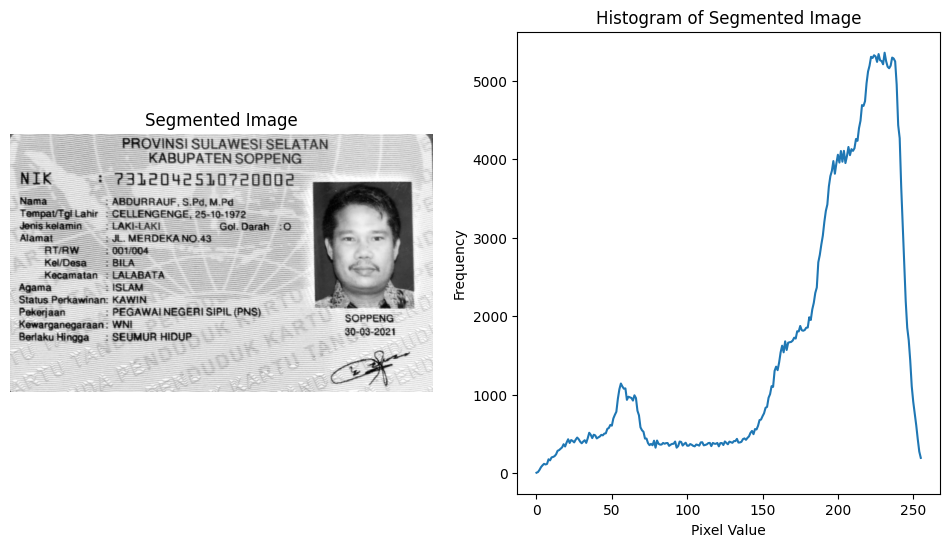

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP.jpeg', cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print("Image not found or could not be loaded.")
else:
    # Load the segmented image (you should have obtained this using a thresholding method)
    segmented_image = cv2.imread('drive/MyDrive/PCVK/KTP.jpeg', cv2.IMREAD_GRAYSCALE)

    if segmented_image is None:
        print("Segmented image not found or could not be loaded.")
    else:
        # Calculate the histogram of the segmented image
        hist = cv2.calcHist([segmented_image], [0], None, [256], [0, 256])

        # Display the segmented image
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.title('Segmented Image')
        plt.imshow(segmented_image, cmap='gray')
        plt.axis('off')

        # Display the histogram of the segmented image
        plt.subplot(1, 2, 2)
        plt.title('Histogram of Segmented Image')
        plt.plot(hist)
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

        plt.show()
